# Rainfall-runoff experiment

In this experiment, we'll try to learn model for simple artificial dataset of simulated rainfall-runoff scenario.

The task is to forecast runoff (prutok) based on rainfall during time. We can test longer dependencies through time and power of LSTM networks.

In [1]:
%tensorflow_version 2.x
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import random

from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dense, Dropout, LSTM, SimpleRNN
from tensorflow import keras
import tensorflow as tf

from tqdm.notebook import tqdm

First, we need a dataset. Here's a code that simulates one river scenario.

There are two methods: `get_precip` for rainfall and `gen_discharge` for runoff. Runoff is lagged in time based on topography of the river (see `BASINS = [BASIN(area, lag)]` array)

In [2]:
MIN_EVENT_TIME = 5
MAX_EVENT_TIME = 20
MIN_EVENT_POWER = 0.05
MAX_EVENT_POWER = 0.5

BASINS = np.array([
    (1, 5),
    (2, 20),
    (2, 30),
    (1, 35),
    (3, 41),
    (2, 45),
    (1, 54),
    (2, 65),
    (1, 75),
])

def generate_precipitation(num_samples, events_ratio):  
    
    result = np.zeros(num_samples)
    num_events = int(events_ratio * num_samples)
    
    for event_start in random.sample(range(num_samples - MAX_EVENT_TIME), num_events):
        event = np.zeros((num_samples,))
        event_time = random.randint(MIN_EVENT_TIME, MAX_EVENT_TIME)
        event_power = random.random() * (MAX_EVENT_POWER - MIN_EVENT_POWER) + MIN_EVENT_POWER
        event[event_start: event_start + event_time] = (np.cos(np.linspace(-np.pi, np.pi, num=event_time)) * 0.5 + 0.5) * event_power
        result += event
    
    return result

def generate_discharge(basins, precip, runoff):            

    volumes = np.zeros((len(basins),len(precip)))
    discharges = np.zeros((len(basins),len(precip)))
    for i, p in enumerate(precip):      
        discharges[:,i] = volumes[:,i-1] * runoff
        volumes[:,i] = basins[:,0] * p + volumes[:,i-1] * (1 -runoff)        
    
    
    sum_discharge = np.zeros(len(precip))
    for d, basin in zip(discharges, basins):        
        lag = int(basin[1])
        lagged = np.roll(d, lag)
        lagged[:lag] = 0.0
        sum_discharge += lagged    
        
    return sum_discharge

Let's see how our simulated river behaves:

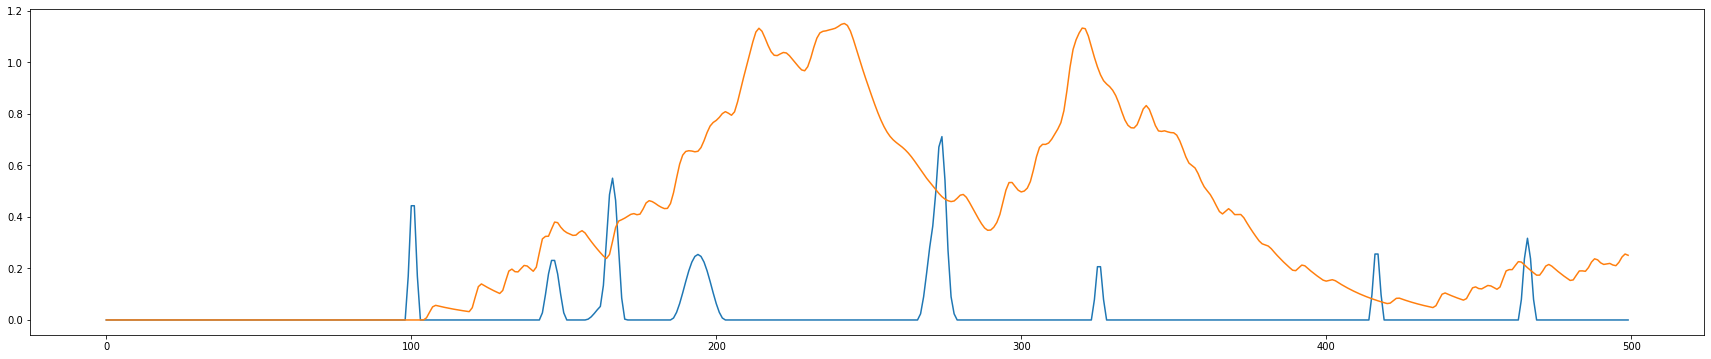

In [3]:
precip = generate_precipitation(500, 0.02)
discharge = generate_discharge(BASINS, precip, 0.05)

plt.figure(figsize=(30,6))
plt.plot(precip)
plt.plot(discharge)
plt.show()

We can generate some training examples for this river and try fit a neural network model to see if the model can learn the river hidden behavior.

In [5]:
import random

NUM_SAMPLES = 2000
SEQ_LEN = 500

raw_train_X = [generate_precipitation(SEQ_LEN, 0.02) for i in tqdm(range(NUM_SAMPLES))]
raw_train_Y = [generate_discharge(BASINS, precip_sample, 0.05) for precip_sample in tqdm(raw_train_X)]

TODO : Test various models:

* fixed window feed-forward network
* LSTMs 
* test on longer sequences
* figure out how to use feed-forward network to longer predictions

**WATCH for correct activation function!**